<a href="https://colab.research.google.com/github/daniel-molina23/NEWSAPI-NLPModel/blob/main/HW5_4650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# !pip install spacy

In [54]:
# !pip install newsapi-python

In [55]:
# !python -m spacy download en_core_web_lg

In [56]:
import spacy
import en_core_web_lg
from newsapi import NewsApiClient

nlp_eng = en_core_web_lg.load()

newsapi = NewsApiClient(api_key='ac0c8e86daca4091ad5b5659fdb1d329')

In [57]:
articleArr = []
for pageNumber in range(1,6): # 1-5 inclusive
  temp = newsapi.get_everything(q='coronavirus', language='en',from_param='2021-02-19',to='2021-03-18', sort_by='relevancy',page=pageNumber)
  articleArr.append(temp)
  print('len of temp: ', len(temp))
print(len(articleArr))
# display(articleArr[0])

len of temp:  3
len of temp:  3
len of temp:  3
len of temp:  3
len of temp:  3
5


In [58]:
import pickle

filename = 'articlesCOVID.pckl'
pickle.dump(articleArr, open(filename,'wb')) # write binary

In [59]:
dados = []
for page, article in enumerate(articleArr):
  for x in article['articles']:
    title = x['title']
    date = x['publishedAt']
    description = x['description']
    content = x['content']
    dados.append({'title':title, 'date':date, 'desc':description, 'content':content})

import pandas as pd
df = pd.DataFrame(dados)
df = df.dropna()
display(df.content.head())
print(len(df))

0    What do you think the next few months look lik...
1    Why havent I seen Wayne Knight in the ads for ...
2    How is the Green Passport system working, for ...
3    But medical ethicists say the list is misleadi...
4    Similar laborious efforts may have to be scale...
Name: content, dtype: object

81


In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [102]:
from string import punctuation
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from spacy.tokens import Doc

def get_keywords_eng(text):
  """
  Receives text and will handle with the spacy model to identify the Part-of-speech
  tagging that match with the keywords of our news.
  We will extract VERB, NOUN and PROPN (proper nouns)
  """
  # token = word_tokenize(text)
  result = []
  # Make the spaCy doc obj for the sentence
  
  tokens = word_tokenize(text)
  pos_tag_ls = pos_tag(tokens) # [(word,token),..] list

  doc = nlp_eng(text)
  # get words (tokens) for the sentence
  for t in doc:
    if(t.text in nlp_eng.Defaults.stop_words or t.text in punctuation or t.text == '\r\n'):
      continue
    else:
      if(t.text[-1]=="'"):
        result.append(t.text[:-1])
      else:
        result.append(t.text)
  # end for
  return result

In [103]:
from collections import Counter
res = []
for content in df.content.values:
  res.append([(x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

print(res)
df['keywords'] = res # this is the new column
print(len(df))
print(len(df.columns))
display(df.head())

[['going', 'What', 'think', 'months', 'look'], ['I', 'nt', 'Knight', 'Why', 'seen'], ['Green', 'Passport', 'How', 'system', 'working'], ['medical', 'But', 'ethicists', 'list', 'misleading'], ['Similar', 'laborious', 'efforts', 'scaled', 'country'], ['snippets', 'viruss', 'Its', 'unique', 'quirk'], ['vaccine', 'The', 'global', 'sharing', 'program'], ['health', 'Community', 'centers', 'Abby', 'said'], ['During', 'summer', 'areas', 'country', 'dealing'], ['5', 'Erik', 'Prince', 'Trump', 'ally'], ['China', 'In', 'amounts', 'public', 'relations'], ['A', 'spokeswoman', 'House', 'transportation', 'committee'], ['March', '1', '2021', '5:10', 'a.m.'], ['Feb.', '19', '2021', '8:33', 'a.m.'], ['MELBOURNE', 'Australia', 'A', 'funny', 'thing'], ['government', 'image', 'captionAnti', 'anger', 'exploded'], ['The', 'University', 'Virginias', 'mens', 'basketball'], ['The', 'Connecticut', 'womens', 'basketball', 'coach'], ['Vaccines', 'available', 'coronavirus', 'cases', 'dropping'], ['Apoorva', 'Mandav

,title,date,desc,content,keywords
0,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...,"[going, What, think, months, look]"
1,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...,"[I, nt, Knight, Why, seen]"
2,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ...","[Green, Passport, How, system, working]"
3,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...,"[medical, But, ethicists, list, misleading]"
4,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...,"[Similar, laborious, efforts, scaled, country]"


In [100]:
filename = 'articlesCOVID.pckl'
pickle.dump(df, open(filename,'wb')) # write binary

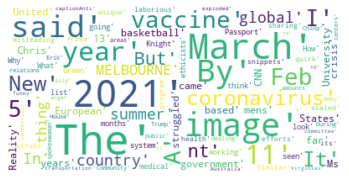

In [104]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = str(res)
wordcloud = WordCloud(max_font_size = 50, max_words=100,background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()